In [1]:
import numpy as np
import scipy.special as special
import scipy.integrate as integrate

import matplotlib.pyplot as plt
import matplotlib as mpl
import time
import mpmath

In [2]:
j = 1j
medium_density = 1204 # in g / m^3
speed_in_medium = 343 # m / s
a = 0.003
bat_SPL_in_dB = 110
bat_frequency = 60000
wavelength = speed_in_medium / bat_frequency

k = 2*np.pi/wavelength
ka = k*a
medium = medium_density * speed_in_medium

bat_flight_speed = 2.0
x = np.arange(-40, 40+bat_flight_speed, bat_flight_speed)
x = x.reshape(1, x.shape[0])
x_inds = np.where(np.isclose(x,0, atol=1e-4))
x[x_inds] = 1e-3
y = np.arange(80, 0-bat_flight_speed, -bat_flight_speed)
y_inds = np.where(np.isclose(y,0, atol=1e-4))
y[y_inds] = 1e-3
y = y.reshape(y.shape[0], 1)
z = 0

r = np.sqrt((x**2) + (y**2))
theta = np.arctan(x/y)

r.shape, theta.shape

((41, 41), (41, 41))

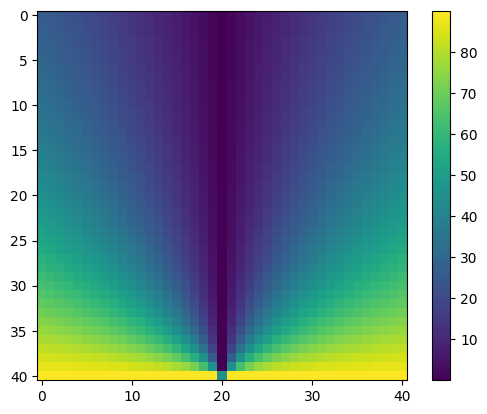

In [3]:
plt.imshow(np.abs(theta*(180/np.pi)))
plt.colorbar()

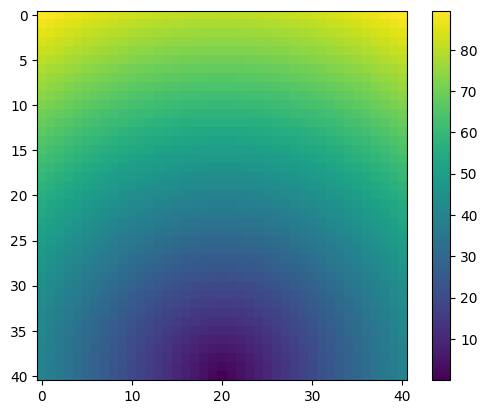

In [4]:
plt.imshow(r)
plt.colorbar()

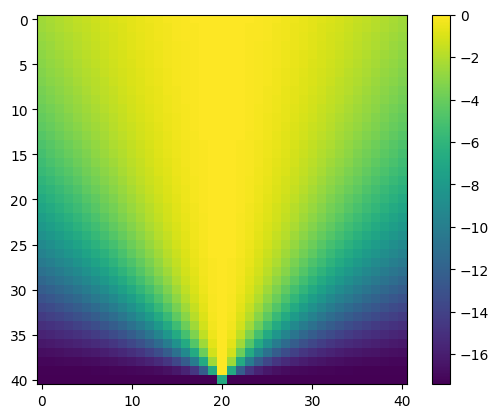

In [5]:
D_theta = 2*special.j1(ka*np.sin(theta))/(ka*np.sin(theta))
D_theta_dB = 20*np.log10(np.abs(D_theta/np.max(D_theta)))
clipped_D_theta_dB = np.clip(D_theta_dB, -24, None)
plt.imshow(clipped_D_theta_dB)
plt.colorbar()

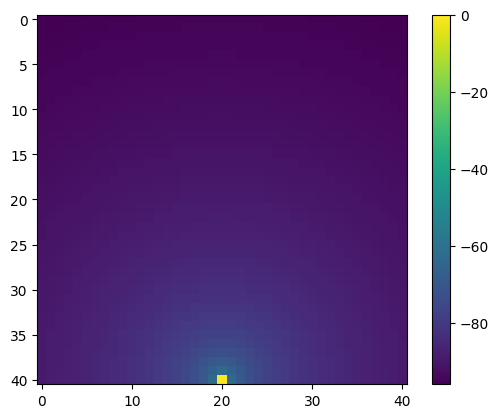

In [6]:
phase_term = np.exp(-j*k*r)
spreading = j*k*(a**2)*(medium)*phase_term/(2*r)
spreading_dB = 20*np.log10(np.abs(spreading/np.max(spreading)))
plt.imshow(spreading_dB)
plt.colorbar()

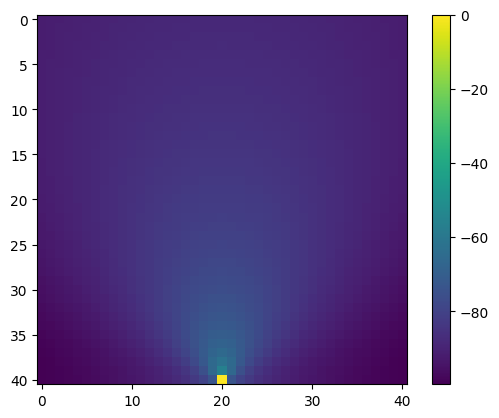

In [7]:
p = spreading*D_theta
p_dB = 20*np.log10(np.abs(p/p.max()))
plt.imshow(p_dB)
plt.colorbar()

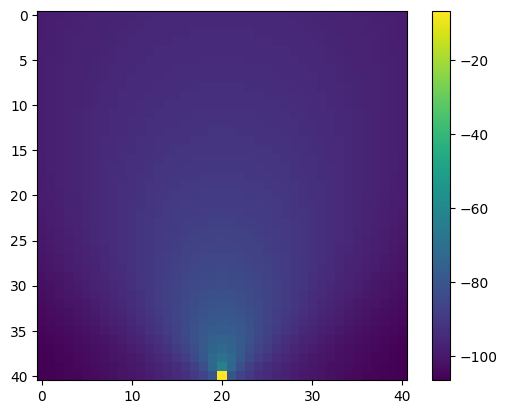

In [8]:
p_dB = spreading_dB+D_theta_dB
plt.imshow(p_dB)
plt.colorbar()

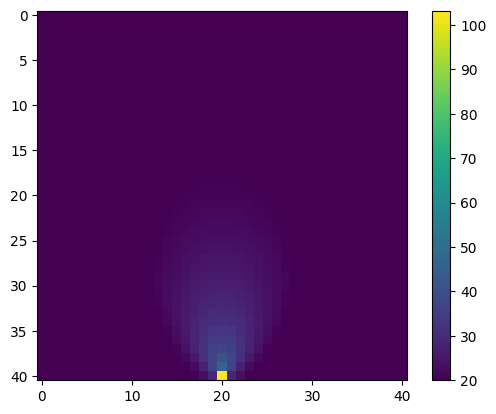

In [9]:
p_dB = spreading_dB+D_theta_dB+110
clipped_p_dB = np.clip(p_dB, 20, None)
plt.imshow(clipped_p_dB)
plt.colorbar()